# **INITIAL RESULTS NOTEBOOK**

In [1]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import src.data.utils as utils
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In this notebook, we begin to perform analyses on the processed datasets. The initial BeerAdvocate and Ratebeer datasets were modified as follows:

* Removal of duplicates
* Adjustment and correction of location formatting
* Consistency check on data types for each column
* Removal of beers that had nbr_ratings > 0
* Check distribution of data
* Recomputation of matrics for beer ratings (overall_score and style_score)

In [2]:
original_PATH = 'data/Original'
processed_PATH = 'data/Processed'

In [3]:
# Loading Data non-processed
beer_ba = pd.read_csv(original_PATH + '/BeerAdvocate/beers.csv')
breweries_ba = pd.read_csv(original_PATH + '/BeerAdvocate/breweries.csv')
users_ba = pd.read_csv(original_PATH + '/BeerAdvocate/users.csv')
beer_rb = pd.read_csv(original_PATH + '/RateBeer/beers.csv')
breweries_rb = pd.read_csv(original_PATH + '/RateBeer/breweries.csv')
users_rb = pd.read_csv(original_PATH + '/RateBeer/users.csv')

# Loading Data Processed
beer_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/beers_processed_dual.csv')
breweries_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/breweries_processed.csv')
users_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/users_processed.csv')
beer_RB = pd.read_csv(processed_PATH + '/RateBeer/beers_processed_dual.csv')
breweries_RB = pd.read_csv(processed_PATH + '/RateBeer/breweries_processed.csv')
users_RB = pd.read_csv(processed_PATH + '/RateBeer/users_processed.csv')

In [4]:
# Let's do an example on the beer_ba dataset
utils.check_differences(beer_rb, beer_RB, 'RateBeer','Processed RateBeer')
print('\n')
utils.check_differences(beer_ba, beer_BA, 'BeerAdvocate','Processed BeerAdvocate')

The starting dimensions of dataset RateBeer was: (442081, 14)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
The processed dataset Processed RateBeer  has dimensions: (358961, 16)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'abv',
       'nbr_ratings', 'avg', 'Style_score', 'Overall_score',
       'nbr_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')


The starting dimensions of dataset BeerAdvocate was: (280823, 15)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtyp

# **USERS ANALYSIS**

### Variation of users in platform during time per location

**_Goal_**: Understand the geographic and demographic distribution of user bases within each dataset to assess their representativeness.

**_Approach_**: We now want to investigate **how the number of users has changed over time and by locatio**n. What we do is to divide the users by year and by 'location' by counting how many users there are for each location for each year. We convert the result to a pivot table, with year_joined as index and location as columns, and user counts as values. We set fill_value=0 to fill any empty cells (years and locations without users) with zero.

**_Note_**: We need to perform a cumulative sum because the users who register in a given year add up to those who were already registered in previous years. So, We want to know the total number of users for each year and how they are distributed by location.

**_Note_**: The table rows created can be of great help in understanding who is doing the reviews and how much each location is contributing to the overall preference!

In [5]:
table_users_BA = utils.nbr_user_per_location_per_time(users_BA, 'BeerAdvocate Processed')
table_users_RB = utils.nbr_user_per_location_per_time(users_RB, 'RateBeer Processed')

# Just as an example
table_users_BA.head()

location,Afghanistan,Albania,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Aotearoa,Argentina,...,United Arab Emirates,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Zimbabwe,Total
year_joined,,,,,,,,,,,,,,,,,,,,,
1996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0
2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420.0
2003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1213.0


Let us identify and visualise what has been the **change over time of the n locations** where the site is most used. As we can see, in the US the site has a whirlwind growth, while in other continents the growth is existing but less pronounced. This leads us to reflect on the need to conduct a separate analysis for states within the US to investigate whether there are differences within US states or whether preferences are shared across the continent.

Top 7 locations: ['United States', 'Canada', 'England', 'Australia', 'Germany', 'Sweden', 'Netherlands']
Top 7 locations: ['United States', 'Canada', 'Australia', 'Denmark', 'England', 'Netherlands', 'Belgium']


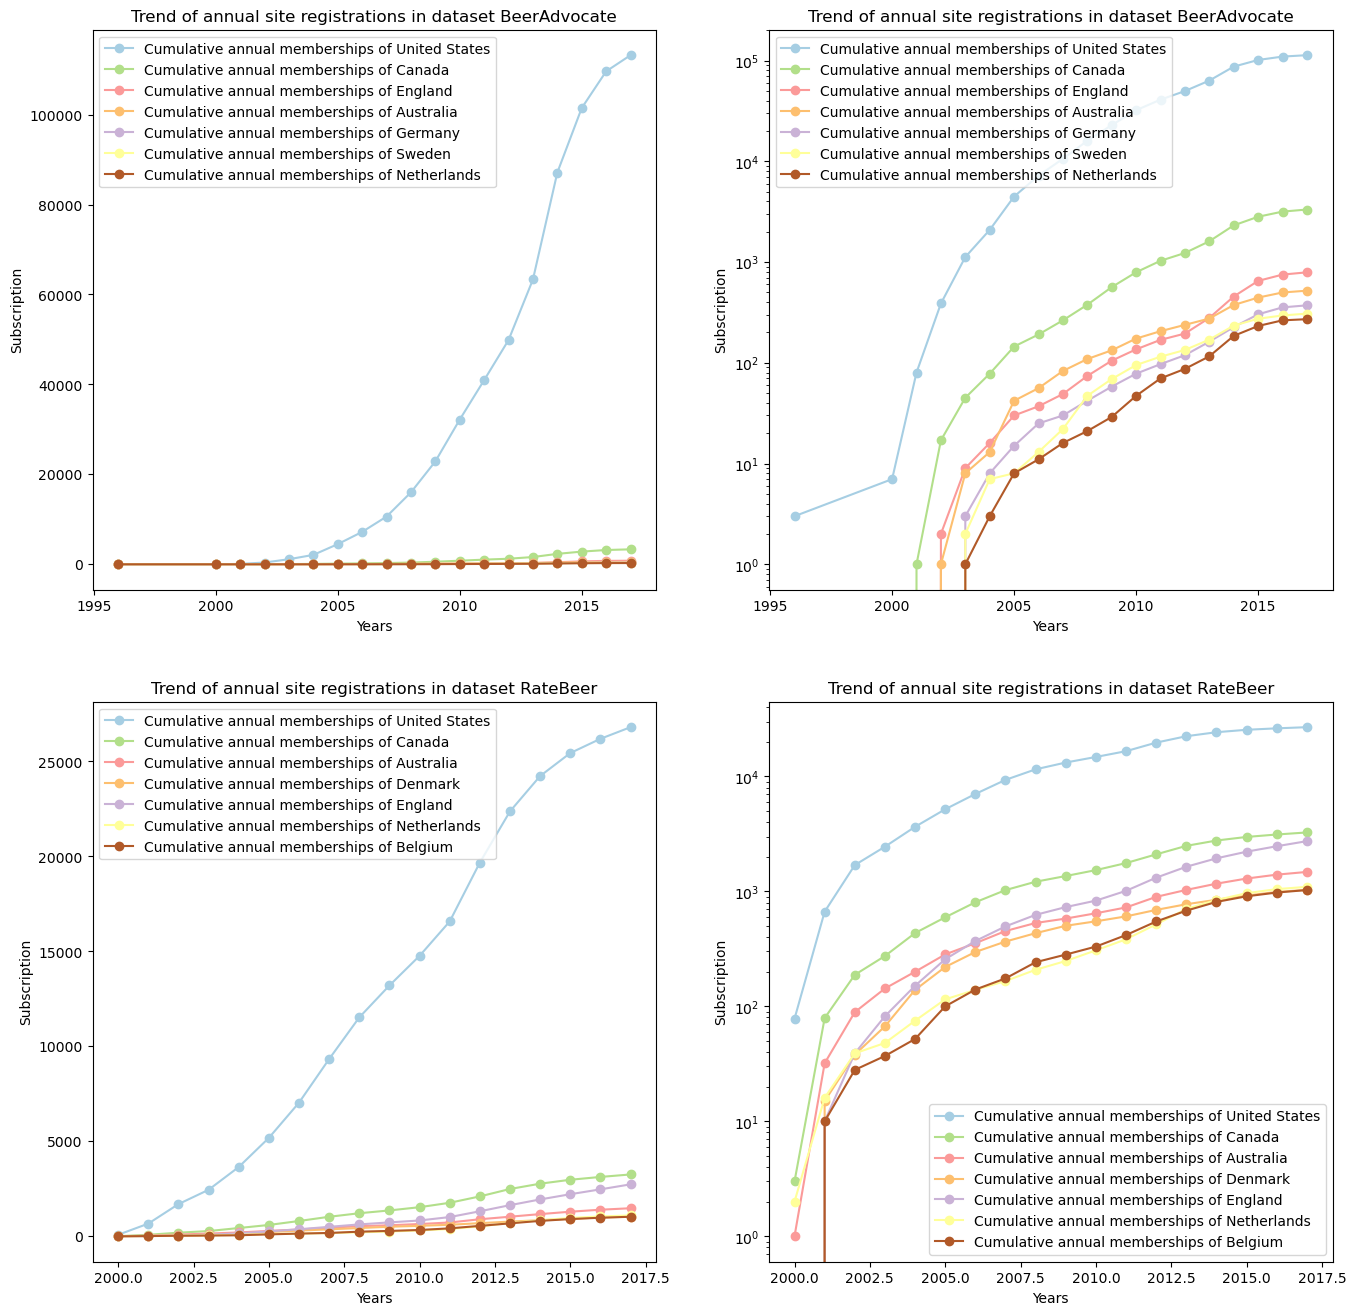

In [6]:
# This function returns the locations that have been in the top-n for the number of users across all the years stored in the database.

n_most_used_location_BA = utils.find_top_n(table_users_BA, n=7)
n_most_used_location_RB = utils.find_top_n(table_users_RB, n=7)

colors = plt.cm.get_cmap('Paired', len(n_most_used_location_BA))  # Using 'Paired' colormap 
fig , ax = plt.subplots(2,2, figsize=(16,16))
plt.sca(ax[0, 0])
for i,loc in enumerate(n_most_used_location_BA):
    utils.time_machine(table_users_BA, 'BeerAdvocate', loc, colors(i), scale ='linear')

plt.sca(ax[0, 1])
for i,loc in enumerate(n_most_used_location_BA):
    utils.time_machine(table_users_BA, 'BeerAdvocate', loc, colors(i), scale ='log')

plt.sca(ax[1, 0])
for i,loc in enumerate(n_most_used_location_RB):
    utils.time_machine(table_users_RB, 'RateBeer', loc, colors(i), scale ='linear')

plt.sca(ax[1, 1])
for i,loc in enumerate(n_most_used_location_RB):
    utils.time_machine(table_users_RB, 'RateBeer', loc, colors(i), scale ='log')

# **BREWER ANALYSIS**

### Distribution of breweries all over the World

_**Goal**_: Understand the geographic and demographic distribution of breweries bases within each dataset to assess their representativeness.

_**Approach**_: In this part, we want to analyse the **geographical distribution** of **breweries** in order to better understand user distribution data

In [7]:
# This function returns a dataframe that provides statistical analysis related to the brewery dataframe.
# Specifically, it calculates, for each location, the total number of beers, the average number of beers, and the standard deviation and median.
dist_RB = utils.loc_distribution(breweries_RB, 'RateBeer', 'location')
dist_BA = utils.loc_distribution(breweries_BA, 'BeerAdvocate', 'location')
# Now we evaluate within the US
dist_RB_US = utils.loc_distribution(breweries_RB[breweries_RB['US']==True], 'RateBeer_US', 'location_region')
dist_BA_US = utils.loc_distribution(breweries_BA[breweries_BA['US']==True], 'BeerAdvocate_US', 'location_region') 
# Just as an example
dist_RB_US.head()

Dataset: RateBeer
- Number of unique "location" value in the dataset: 214
Dataset: BeerAdvocate
- Number of unique "location" value in the dataset: 197
Dataset: RateBeer_US
- Number of unique "location" value in the dataset: 1
Dataset: BeerAdvocate_US
- Number of unique "location" value in the dataset: 1


,location_region,brewery_count,total_beers,mean_beers,std_beers,median_beers
0,Alabama,42,1020,24.285714,28.015924,14.5
1,Alaska,35,1561,44.600000,49.716372,27.0
2,Arizona,115,3664,31.860870,35.719641,21.0
3,Arkansas,32,456,14.250000,11.322259,11.0
4,California,861,28535,33.141696,45.063221,16.0


Let's take a look on the top_boundaries of our dataset. We can notice that the max number of beer for brewer in BA dataset is way highter than in RB!

In [8]:
print('Max number of beer for BA:', breweries_BA['nbr_beers'].max(),'\nMax number of beer for RB:',breweries_RB['nbr_beers'].max())

Max number of beer for BA: 1196 
Max number of beer for RB: 295


We select the locations with the most breweries and plot the number of breweries for the top n (=15) locations. We do this for both the complete dataset and the subset that only includes the US. What we observe is that, in both datasets, the US has the most breweries, and within the US, there is a large variability represented by the standard deviation in the plot.

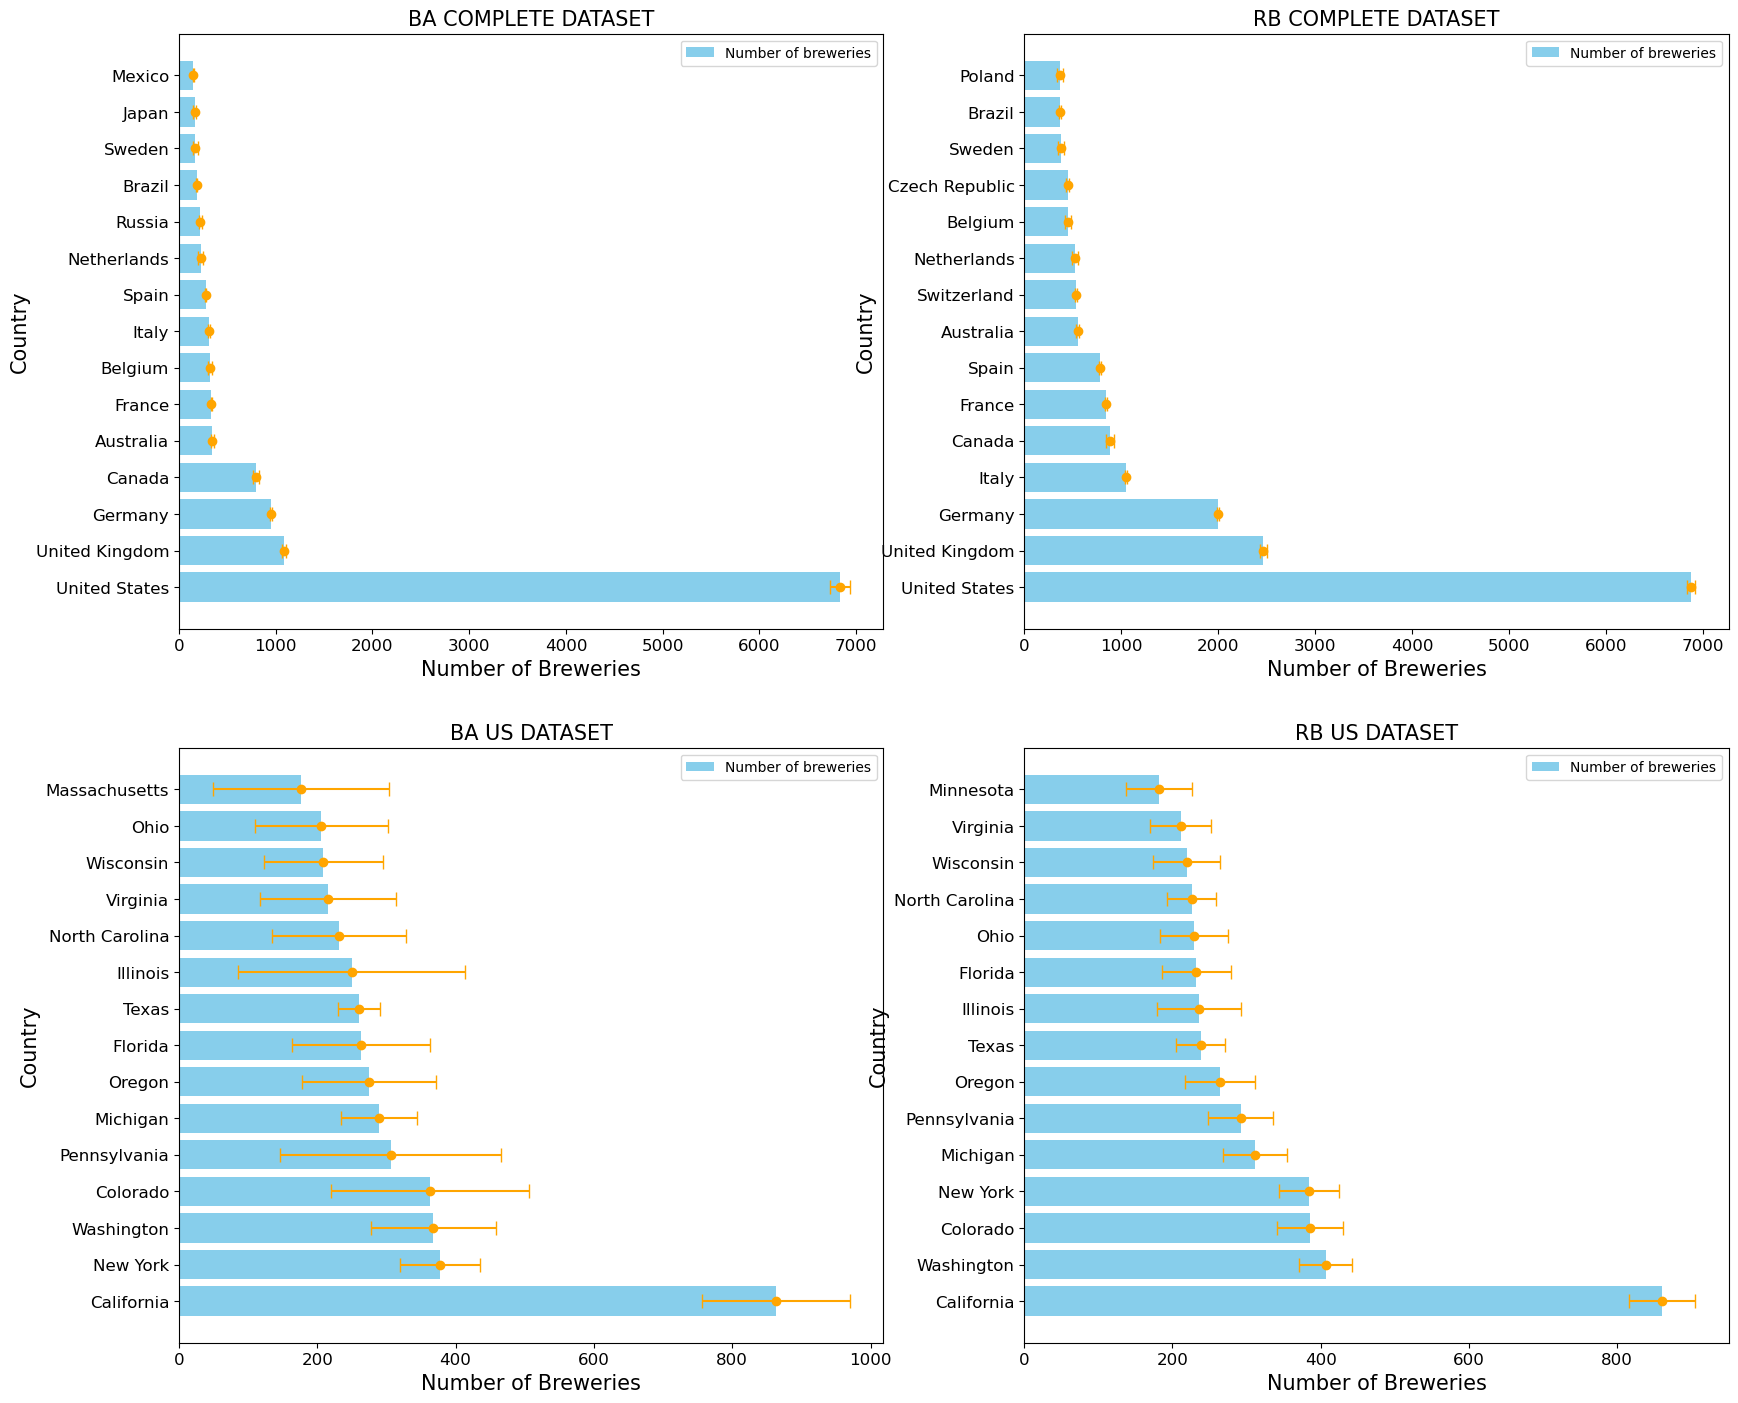

In [9]:
utils.comparing_plot(dist_BA, dist_RB, dist_BA_US, dist_RB_US,n=15)

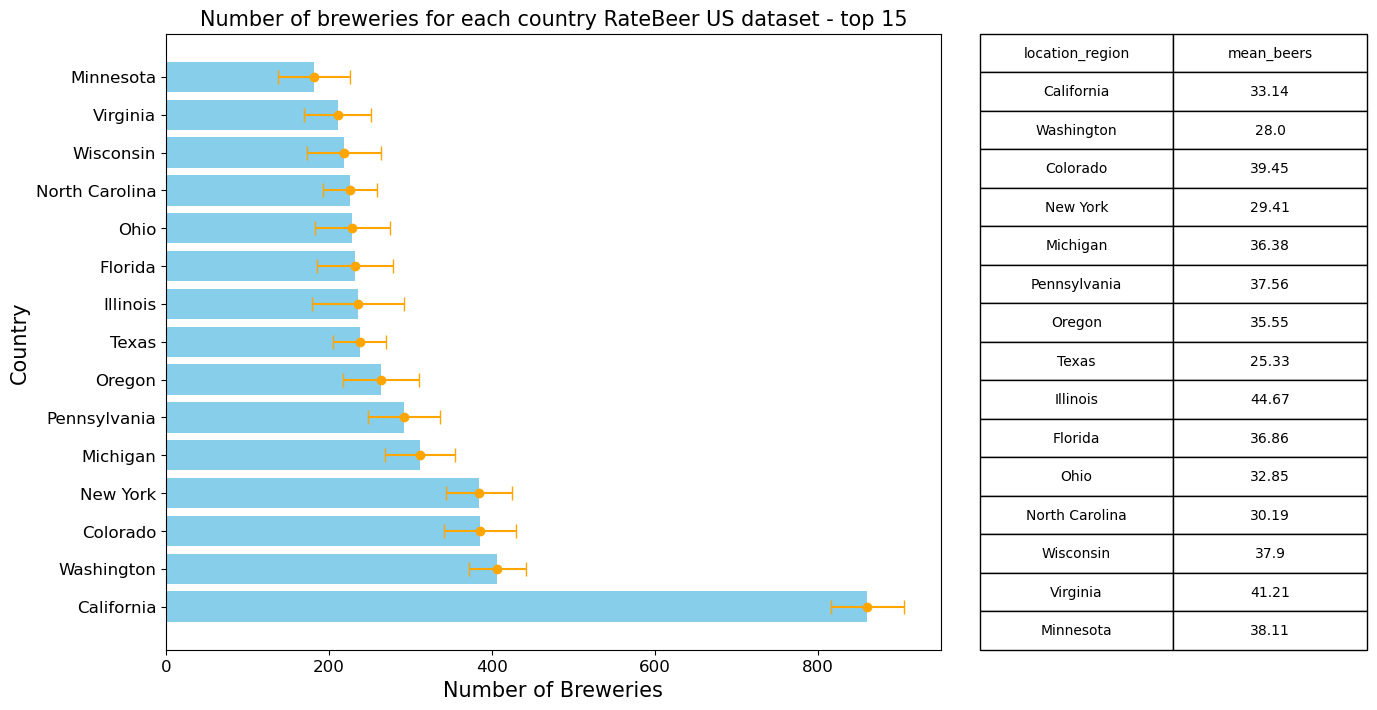

In [10]:
# We can further deepen the analysis by investigating how many beers, on average, are available at a location within a brewery."
utils.plotting_dist(dist_RB_US,'RateBeer US', n=15, location='location_region')

# **BEER ANALYSIS**

### Score correlation

We have different scores on the beers, we'll now first analyse the correlation between them, as well as with the number of ratings.

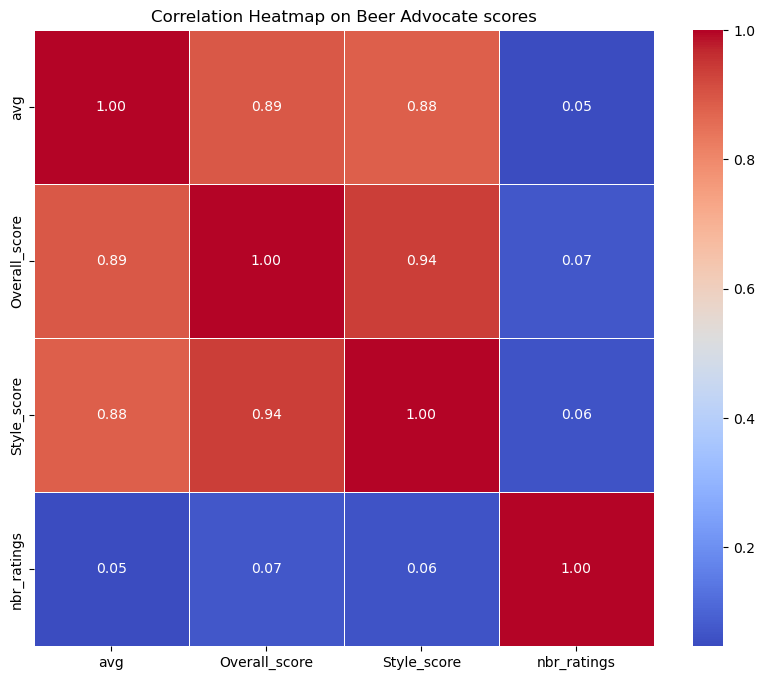

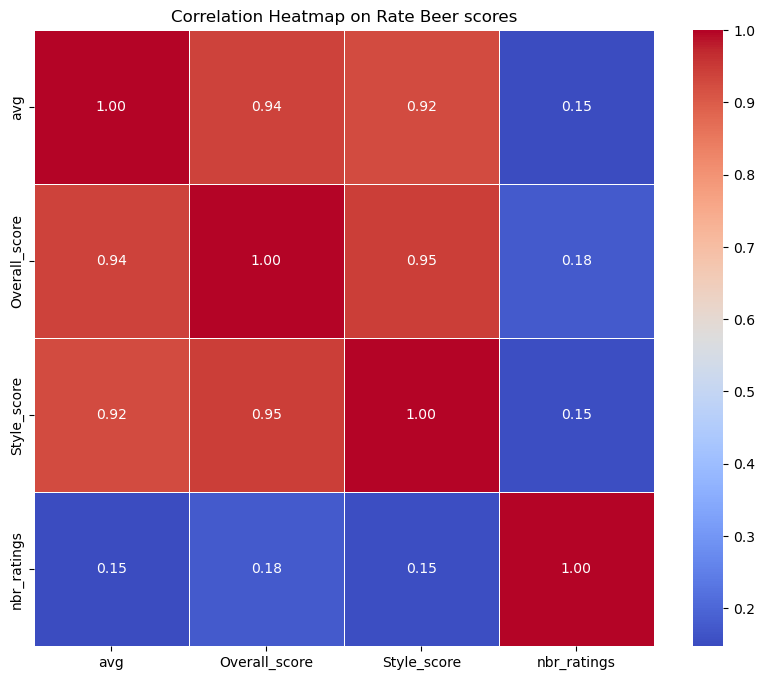

In [11]:
correlation_matrix = beer_BA[['avg', 'Overall_score', 'Style_score',
                              'nbr_ratings']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap on Beer Advocate scores")
plt.show()

correlation_matrix = beer_RB[['avg', 'Overall_score', 'Style_score',
                              'nbr_ratings']].corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap on Rate Beer scores")
plt.show()

As it can be seen, the number of ratings do not highly relate to the score obtained either overall or style.

### Top Beers by scores

We'll now visualize the top beers when it comes to average, overall and style score for both datasets.

>How to read the plot: We aim to visualize the top 20 beers based on these three indicators to check for overlap among them. The reason some beers in one of the columns do not have a bar is that they are not among the top 20 beers for that specific indicator. On the x-axis, we have more than 20 beers listed because it includes all beers that appear in the top 20 for at least one indicator.

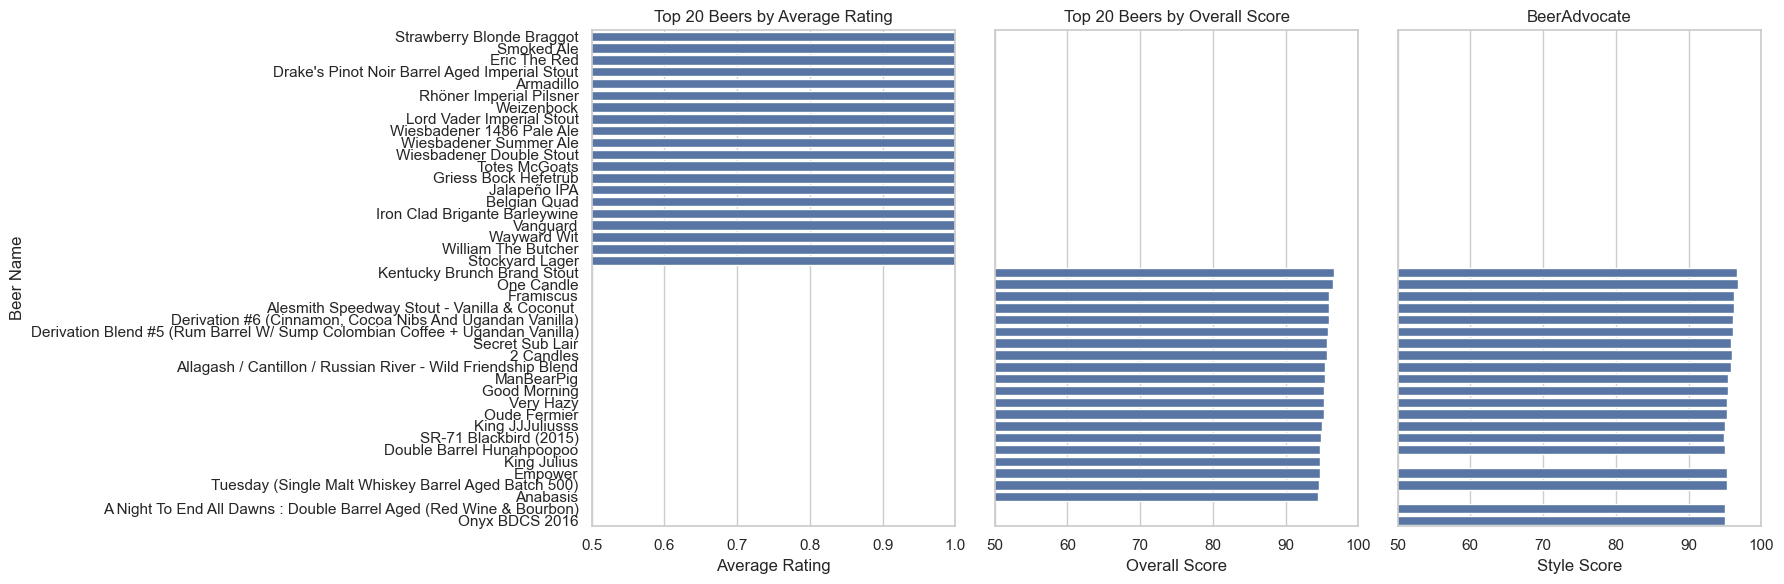

In [12]:
top_avg_beers = beer_BA[['beer_name', 'avg']].sort_values(by='avg', ascending=False).head(20)
top_overall_beers = beer_BA[['beer_name', 'Overall_score']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_BA[['beer_name', 'Style_score']].sort_values(by='Style_score', ascending=False).head(20)

utils.tripe_hist_plot_beers(top_avg_beers, top_overall_beers, top_style_beers, "BeerAdvocate")

We see that the top 10 beers in average score all score 1 (normalized), so at this point we might also have to take into account the number of ratings for each beer so that the analysis is not biased.

We'll now compute the Weighted Average (Bayesian average):

$$
\begin{equation}
WA = \frac{(\bar{x} \cdot n) + (\mu \cdot m)}{n+m}
\end{equation}
$$

Where  is the score average, is the number of ratings, is the global average score (mean of all avg scores), and is the weighting threshold, which we'll set to the median.

In [13]:
global_avg_mean_ba=np.mean(beer_BA['avg'])
weighting_thres_ba=beer_BA['nbr_ratings'].median()
beer_BA['wavg']=beer_BA.apply(utils.calculate_weighted_avg,axis=1,global_mean=global_avg_mean_ba,m=weighting_thres_ba)

Then again, we'll plot the scores for the top 20 beers.

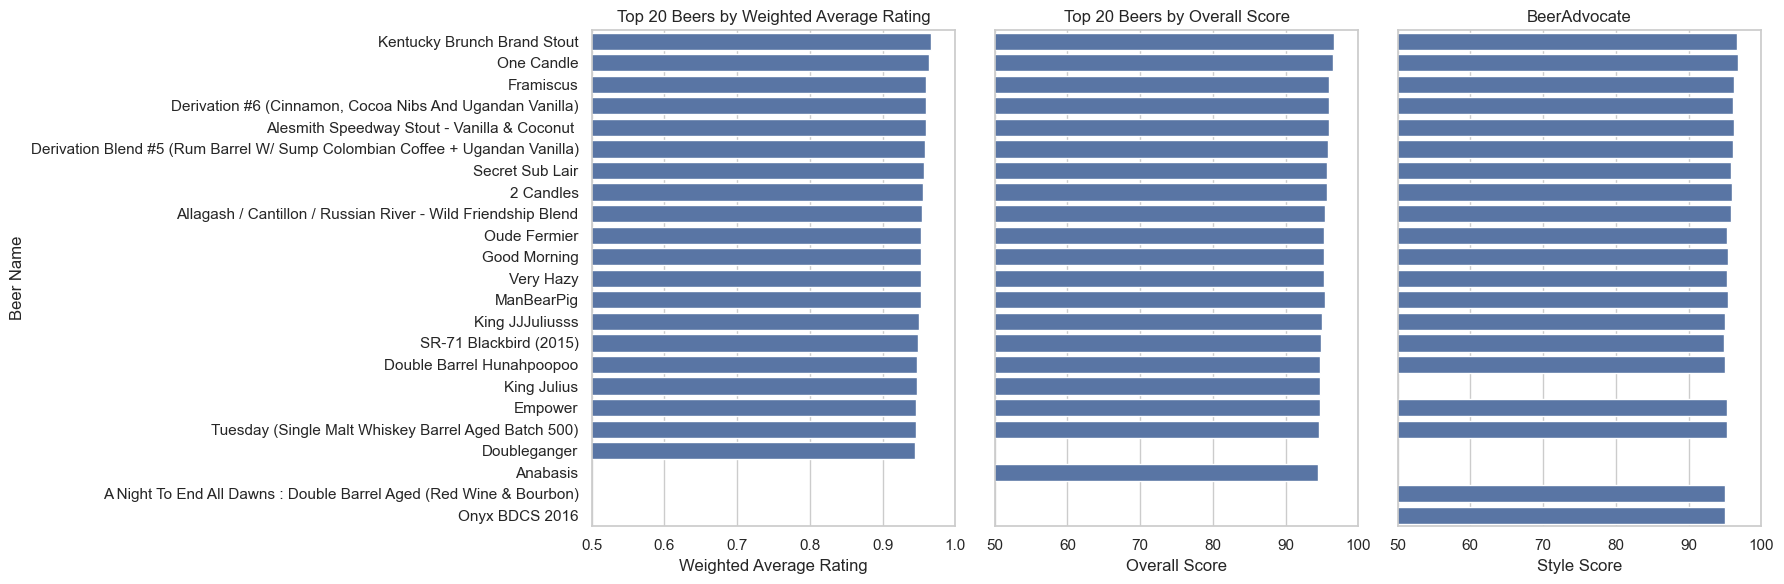

In [14]:
#1. Beer Advocate

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_BA[['beer_name', 'wavg']].sort_values(by='wavg', ascending=False).head(20)
top_overall_beers = beer_BA[['beer_name', 'Overall_score']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_BA[['beer_name', 'Style_score']].sort_values(by='Style_score', ascending=False).head(20)

utils.tripe_hist_plot_beers_weighted(top_avg_beers,top_overall_beers, top_style_beers, "BeerAdvocate")

Now we can see there is more variation on the average score obtained by the top 20 beers. Also, we can see that the different scores show similar results.

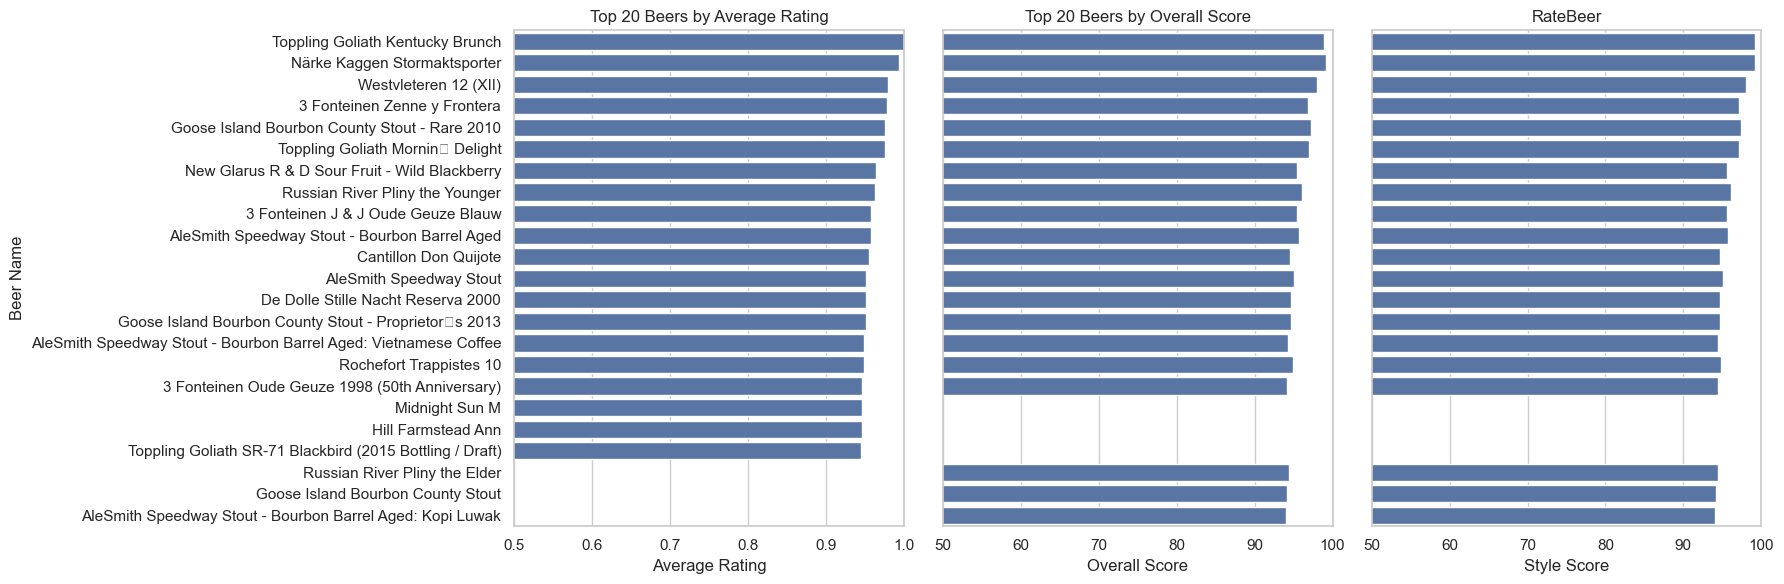

In [15]:
#2. Rate Beer

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_RB[['beer_name', 'avg']].sort_values(by='avg', ascending=False).head(20)
top_overall_beers = beer_RB[['beer_name', 'Overall_score']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_RB[['beer_name', 'Style_score']].sort_values(by='Style_score', ascending=False).head(20)

utils.tripe_hist_plot_beers(top_avg_beers, top_overall_beers, top_style_beers, "RateBeer")

We'll also compute the average weighted for Rate Beer.

In [16]:
global_avg_mean_rb=np.mean(beer_RB['avg'])
weighting_thres_rb=beer_RB['nbr_ratings'].median()
beer_RB['wavg']=beer_RB.apply(utils.calculate_weighted_avg,axis=1,global_mean=global_avg_mean_rb,m=weighting_thres_rb)

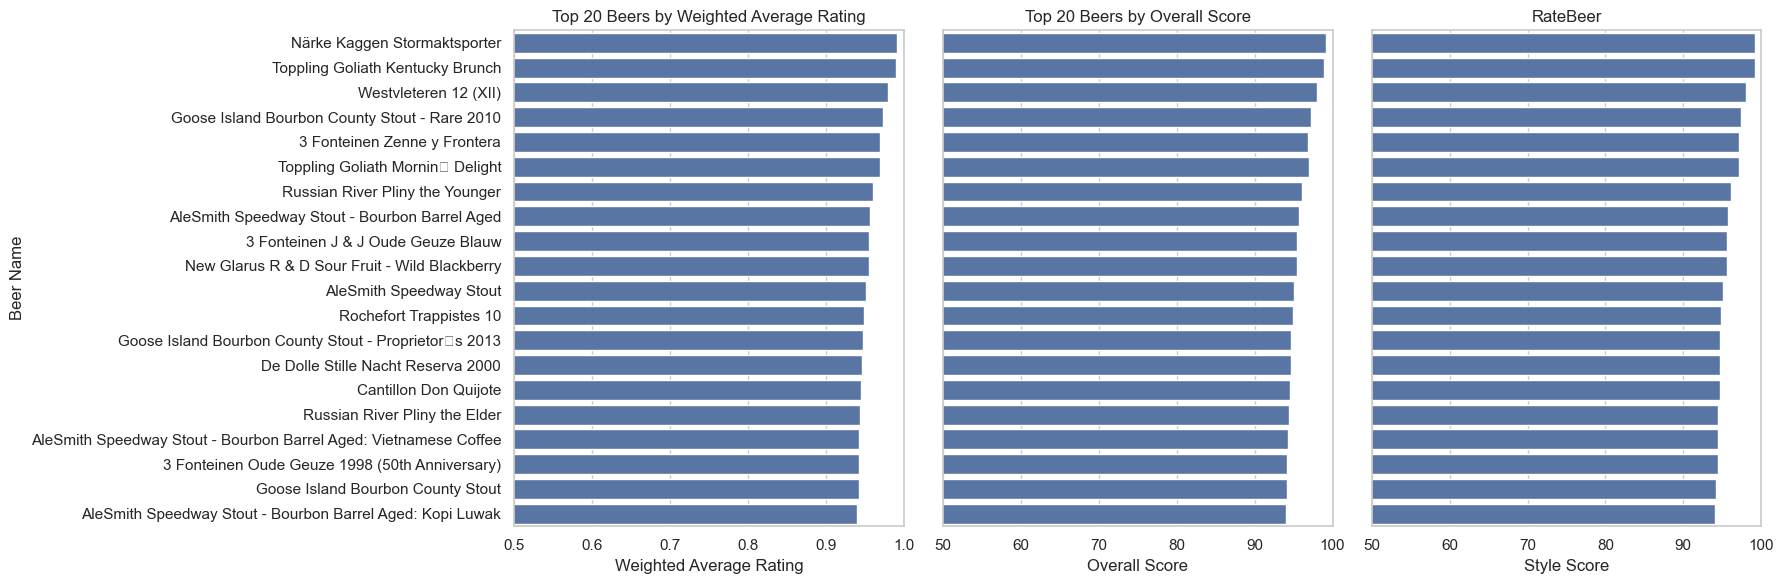

In [17]:
#2. Rate Beer

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_RB[['beer_name', 'wavg']].sort_values(by='wavg', ascending=False).head(20)
top_overall_beers = beer_RB[['beer_name', 'Overall_score']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_RB[['beer_name', 'Style_score']].sort_values(by='Style_score', ascending=False).head(20)


utils.tripe_hist_plot_beers_weighted(top_avg_beers, top_overall_beers, top_style_beers, "RateBeer")

In this specific case, the same beers appear in each top 20.

### Beer styles

We can also take a look at the beer styles and how many different beers each style has.

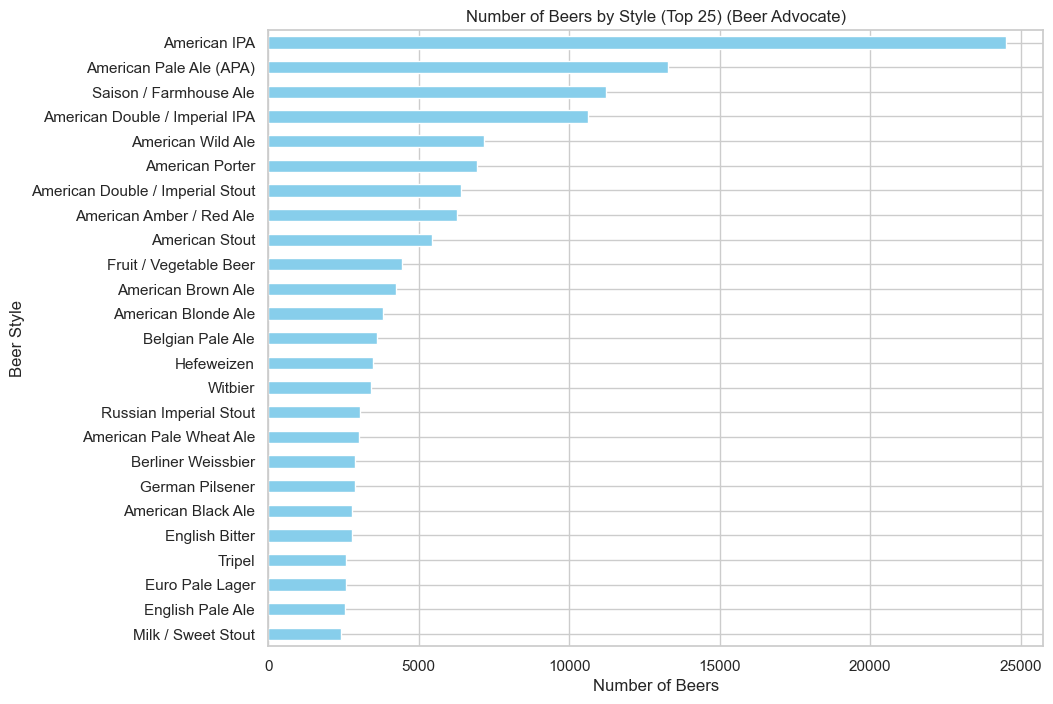

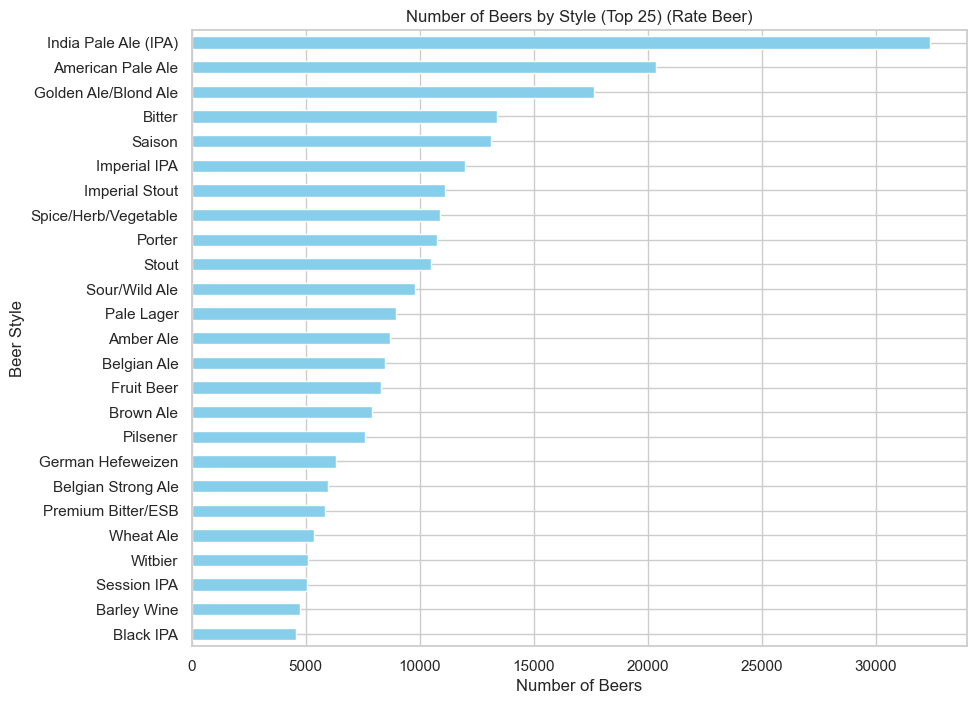

In [18]:
# Count the number of beers per style
style_counts_ba = beer_BA['style'].value_counts()[:25]
style_counts_rb = beer_RB['style'].value_counts()[:25]

# Plot a horizontal bar chart of the beer count by style
# Beer Advocate
plt.figure(figsize=(10, 8))  
style_counts_ba.plot(kind='barh', color='skyblue')
plt.title('Number of Beers by Style (Top 25) (Beer Advocate)')
plt.xlabel('Number of Beers')
plt.ylabel('Beer Style')
plt.gca().invert_yaxis() 
plt.show()

# Rate Beer
plt.figure(figsize=(10, 8))  
style_counts_rb.plot(kind='barh', color='skyblue')
plt.title('Number of Beers by Style (Top 25) (Rate Beer)')
plt.xlabel('Number of Beers')
plt.ylabel('Beer Style')
plt.gca().invert_yaxis() 
plt.show()


It can be seen that American IPA is the most popular style when it comes to beer producing in the BA dataset, and the Indian Pale Ale for the Rate Beer.

### Number of beers produced by location

We can also analyse the number of beers produced by countries.

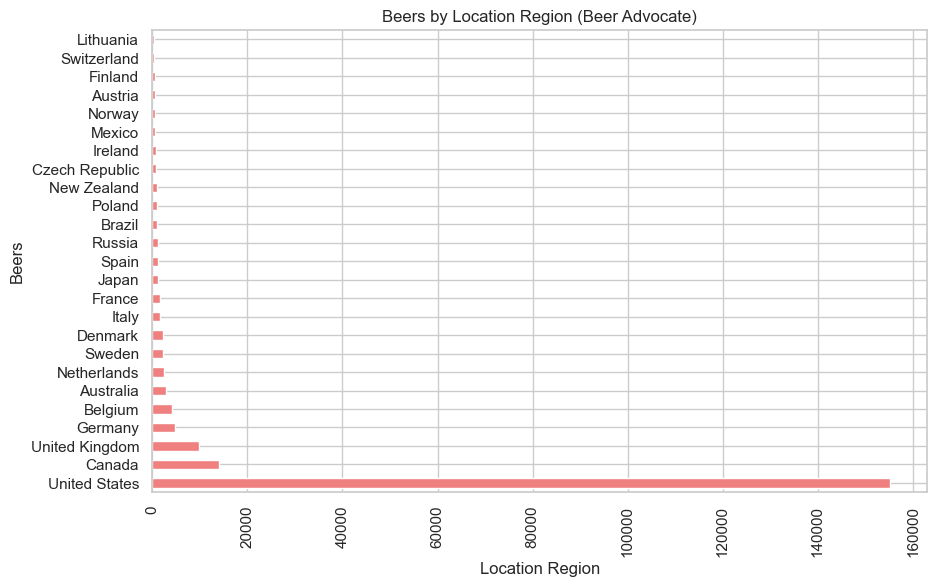

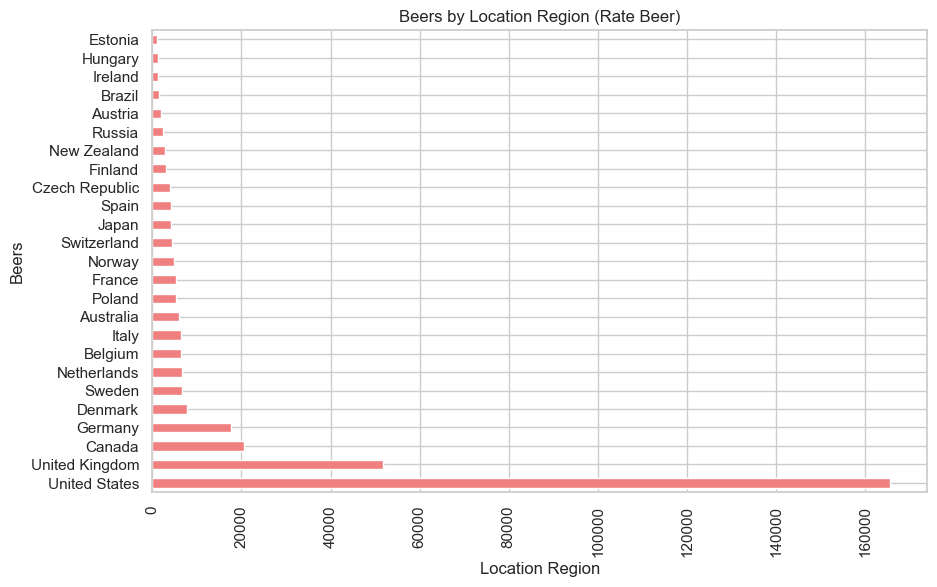

In [19]:
# Count of beers by region or country
location_counts_ba = beer_BA['location'].value_counts()[:25]
location_counts_rb = beer_RB['location'].value_counts()[:25]

# Plot a bar chart of beers by country
#Beer Advocate
plt.figure(figsize=(10, 6))
location_counts_ba.plot(kind='barh', color='lightcoral')
plt.title('Beers by Location Region (Beer Advocate)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

#Rate Beer
plt.figure(figsize=(10, 6))
location_counts_rb.plot(kind='barh', color='lightcoral')
plt.title('Beers by Location Region (Rate Beer)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

As it can be seen, United States is the top beer producer with regards the information in this dataset, we can conduct a side analysis on United States.

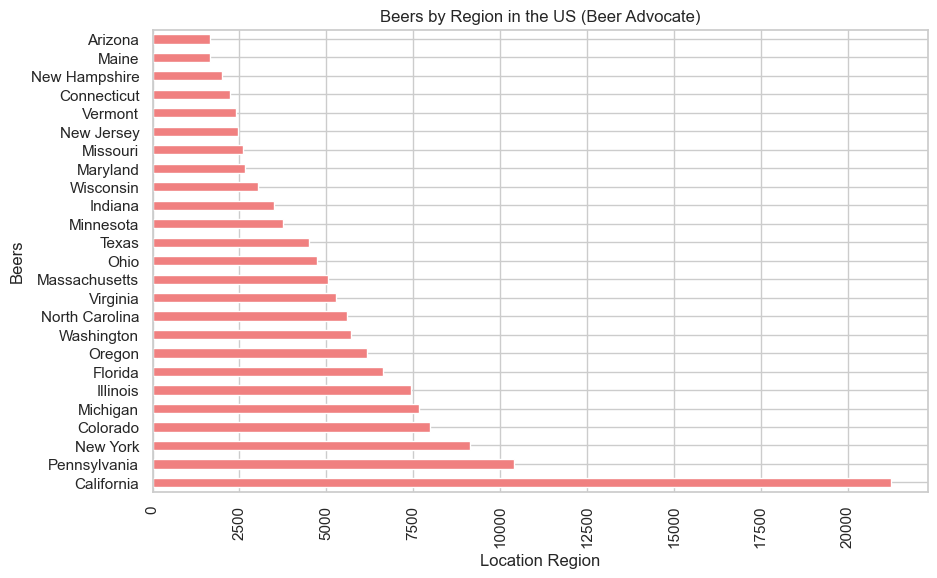

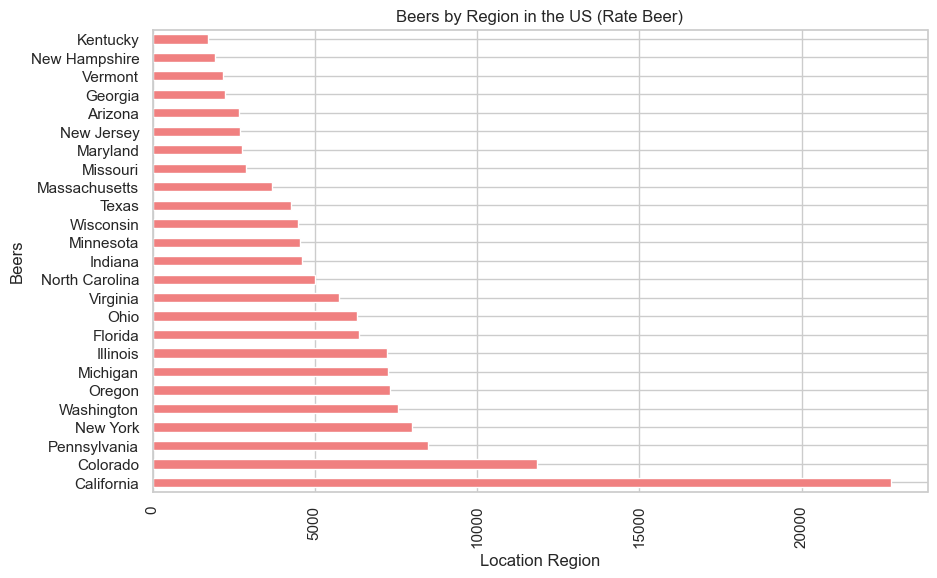

In [20]:
# Count of breweries by region or country
location_counts_ba = beer_BA[beer_BA['location']=='United States']['location_region'].value_counts()[:25]
location_counts_rb = beer_RB[beer_RB['location']=='United States']['location_region'].value_counts()[:25]

# Plot a bar chart of breweries by region in US
# Beer Advocate
plt.figure(figsize=(10, 6))
location_counts_ba.plot(kind='barh', color='lightcoral')
plt.title('Beers by Region in the US (Beer Advocate)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

# Rate Beer
plt.figure(figsize=(10, 6))
location_counts_rb.plot(kind='barh', color='lightcoral')
plt.title('Beers by Region in the US (Rate Beer)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

California is indeed the US state producing the more beers.

We can carry out the same analysis with the United Kingdom.

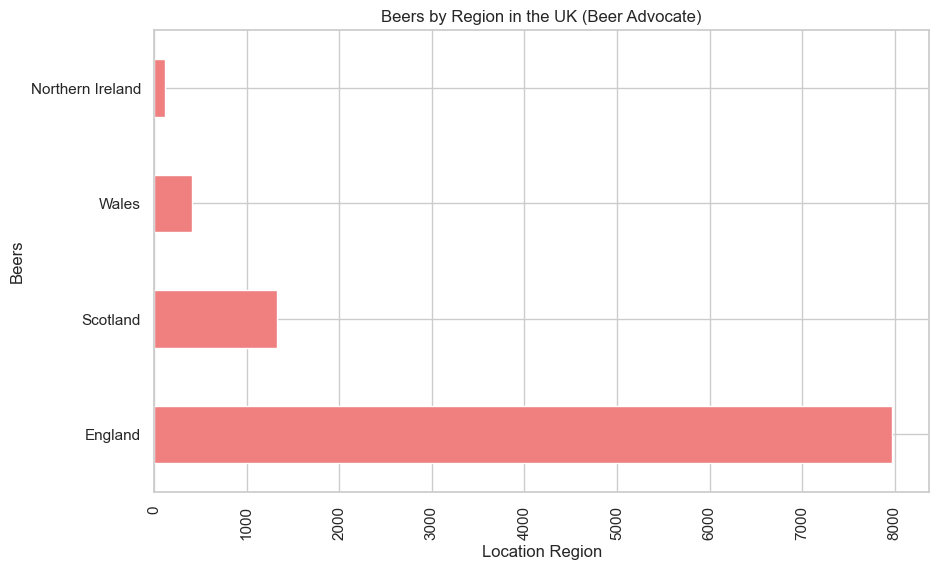

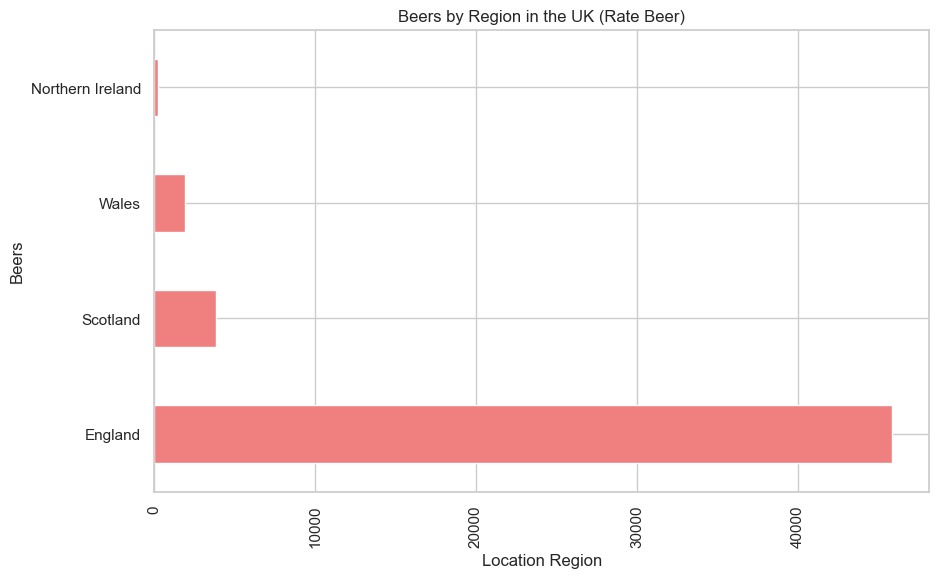

In [21]:
# Count of breweries by region or country
location_counts_ba = beer_BA[beer_BA['location']=='United Kingdom']['location_region'].value_counts()[:25]
location_counts_rb = beer_RB[beer_RB['location']=='United Kingdom']['location_region'].value_counts()[:25]

# Plot a bar chart of breweries by region in US
# Beer Advocate
plt.figure(figsize=(10, 6))
location_counts_ba.plot(kind='barh', color='lightcoral')
plt.title('Beers by Region in the UK (Beer Advocate)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

# Rate Beer
plt.figure(figsize=(10, 6))
location_counts_rb.plot(kind='barh', color='lightcoral')
plt.title('Beers by Region in the UK (Rate Beer)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

We'll now carry out the top beers analysis but taking into account the location as well.

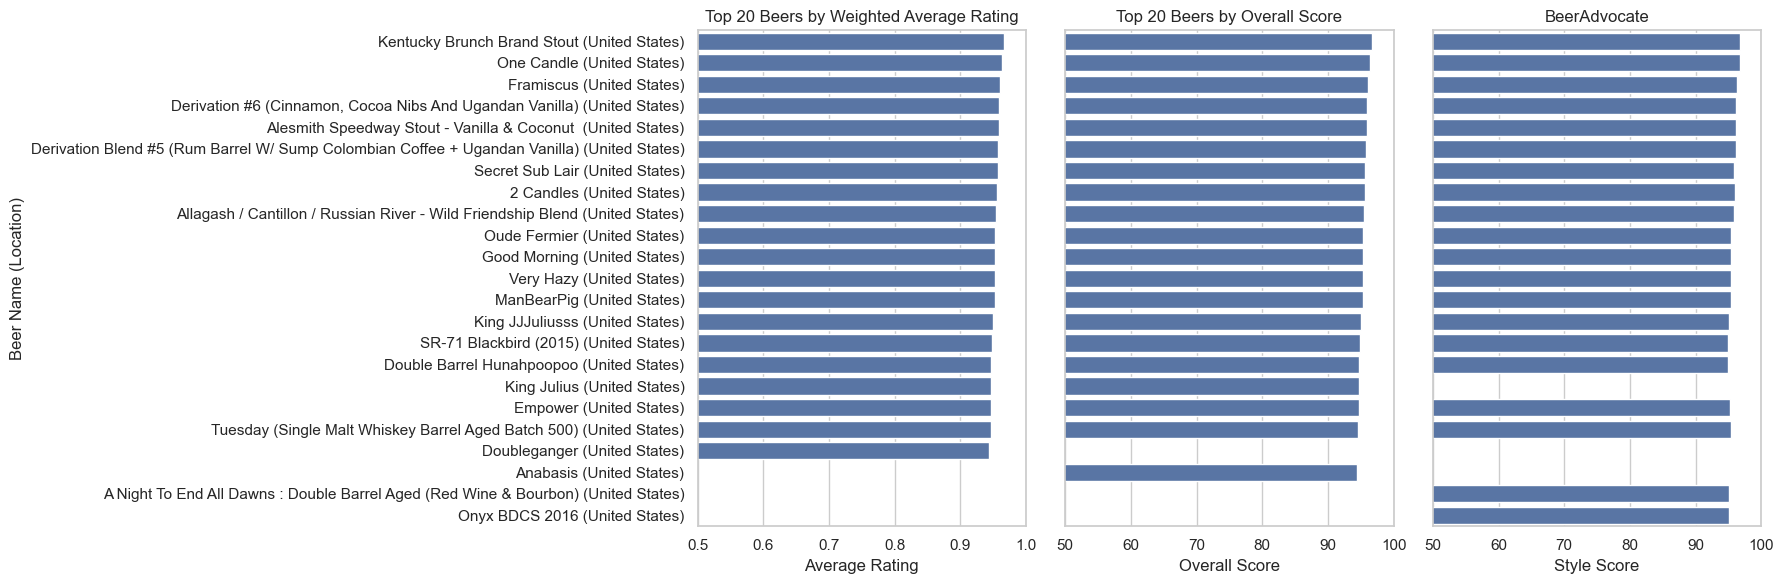

In [22]:
#1. Beer Advocate

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_BA[['beer_name', 'wavg', 'location']].sort_values(by='wavg', ascending=False).head(20)
top_overall_beers = beer_BA[['beer_name', 'Overall_score', 'location']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_BA[['beer_name', 'Style_score', 'location']].sort_values(by='Style_score', ascending=False).head(20)

# Create a new column combining beer name and location for display
top_avg_beers['beer_label'] = top_avg_beers['beer_name'] + " (" + top_avg_beers['location'] + ")"
top_overall_beers['beer_label'] = top_overall_beers['beer_name'] + " (" + top_overall_beers['location'] + ")"
top_style_beers['beer_label'] = top_style_beers['beer_name'] + " (" + top_style_beers['location'] + ")"

utils.tripe_hist_plot_beers_weighted2(top_avg_beers, top_overall_beers, top_style_beers, "BeerAdvocate")

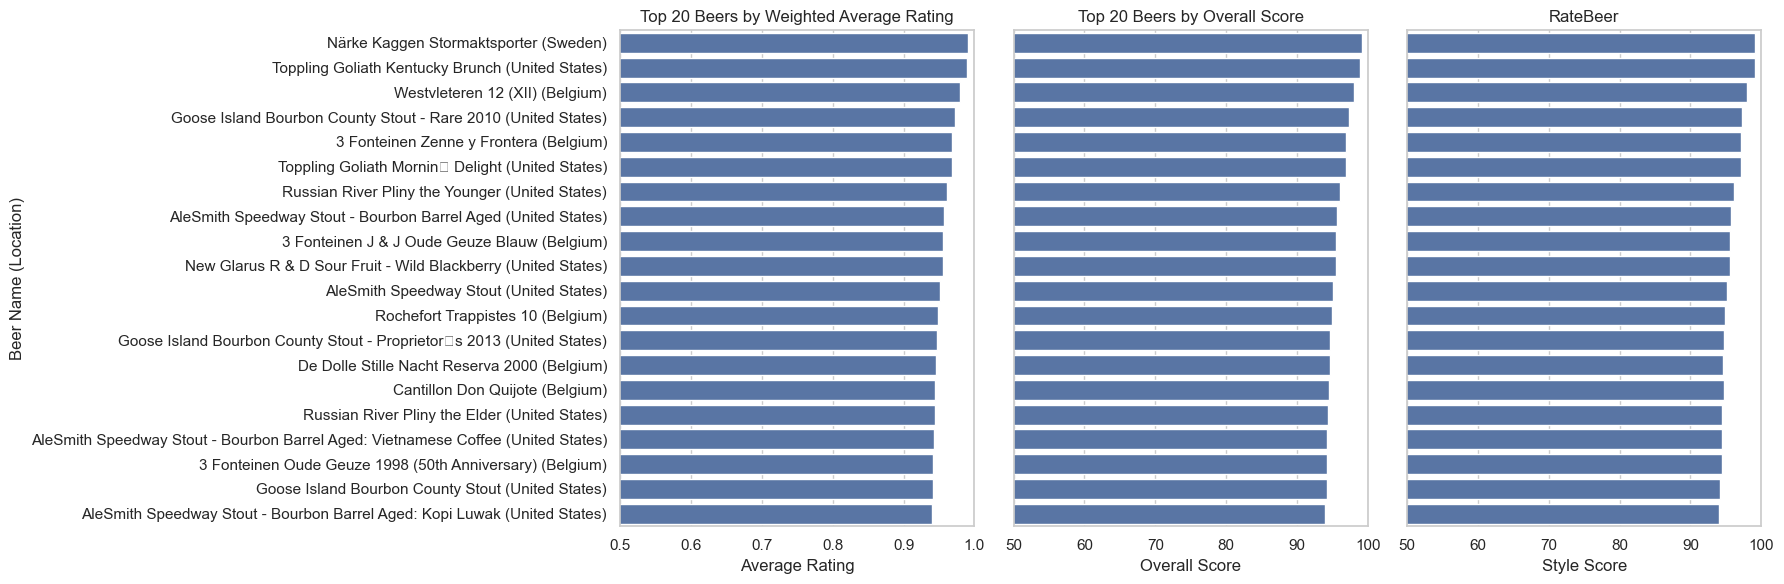

In [23]:
#2. Rate Beer

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_RB[['beer_name', 'wavg', 'location']].sort_values(by='wavg', ascending=False).head(20)
top_overall_beers = beer_RB[['beer_name', 'Overall_score', 'location']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_RB[['beer_name', 'Style_score', 'location']].sort_values(by='Style_score', ascending=False).head(20)

# Create a new column combining beer name and location for display
top_avg_beers['beer_label'] = top_avg_beers['beer_name'] + " (" + top_avg_beers['location'] + ")"
top_overall_beers['beer_label'] = top_overall_beers['beer_name'] + " (" + top_overall_beers['location'] + ")"
top_style_beers['beer_label'] = top_style_beers['beer_name'] + " (" + top_style_beers['location'] + ")"

utils.tripe_hist_plot_beers_weighted2(top_avg_beers, top_overall_beers, top_style_beers, "RateBeer")

It can be seen that US is super prevalent when it comes to top beers from the Beer Advocate dataset. In the Rate Beer database, there is more variety when it comes to top beers and country that produces them.

# **RATINGS ANALYSIS**

In [24]:
ratings_RB = pd.read_csv(processed_PATH + '/RateBeer/ratings_processed.csv')
ratings_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/ratings_processed.csv')

In [25]:
ratings_RB.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,location_region_beer,US_beer,UK_beer,Canada_beer,location_user,location_region_user,US_user,UK_user,Canada_user,year
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,...,NaN,False,False,False,Poland,NaN,False,False,False,2016.0
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 11:00:00,MAGICuenca91,442761,2,...,NaN,False,False,False,Spain,NaN,False,False,False,2017.0
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 10:00:00,Sibarh,288889,3,...,NaN,False,False,False,Poland,NaN,False,False,False,2016.0
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 11:00:00,fombe89,250510,4,...,NaN,False,False,False,Spain,NaN,False,False,False,2016.0
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,...,NaN,False,False,False,Germany,NaN,False,False,False,2015.0


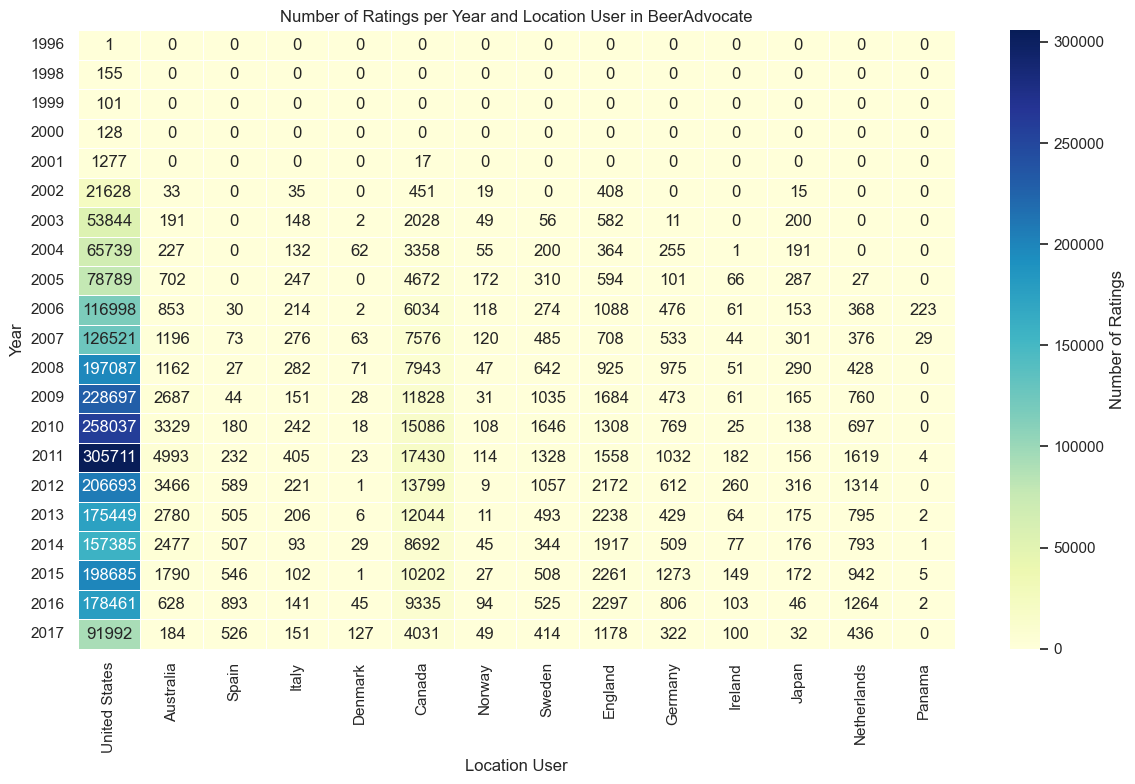

In [26]:
ratings_per_location_year = ratings_BA.groupby(['year', 'location_user']).size().reset_index(name='num_ratings')


ratings_pivot = ratings_per_location_year.pivot_table(index='year', columns='location_user', values='num_ratings', aggfunc='sum')


ratings_pivot = ratings_pivot.fillna(0).astype(int)  # Fill NaN with 0 and convert to int

# selection of interesting countries
selected_countries = ['United States', 'Australia', 'Spain', 'Italy', 'Denmark',
                      'Canada', 'Norway', 'Sweden', 'England', 'Germany',
                      'Ireland', 'Japan', 'Netherlands', 'Panama']

ratings_pivot_selected = ratings_pivot[selected_countries]

num_chunks = len(ratings_pivot_selected.columns) // 14 + (1 if len(ratings_pivot_selected.columns) % 14 != 0 else 0)  # Calculate number of chunks
num_chunks

for i in range(num_chunks):
    
    start_col = i * 14
    end_col = start_col + 14
    chunk = ratings_pivot_selected.iloc[:, start_col:end_col]

    
    plt.figure(figsize=(12, 8))
    sns.heatmap(chunk, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Number of Ratings'})

    
    plt.title('Number of Ratings per Year and Location User in BeerAdvocate')
    plt.xlabel('Location User')
    plt.ylabel('Year')
    plt.tight_layout()
    plt.show()

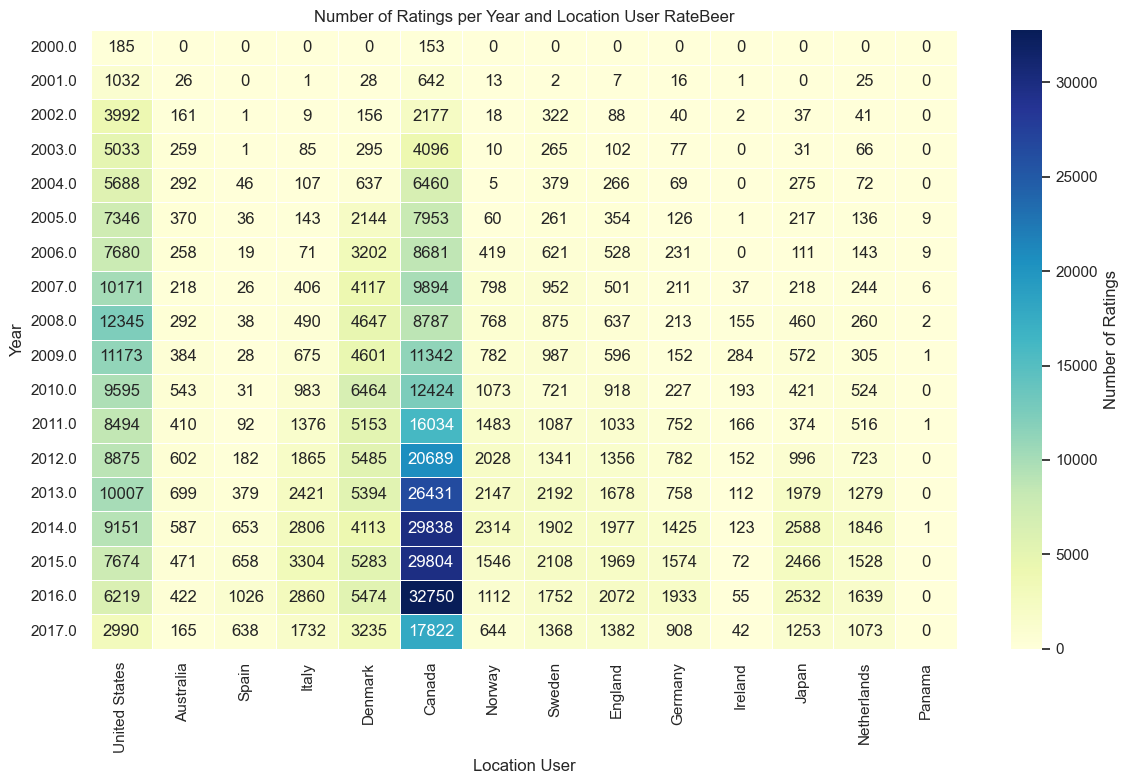

In [27]:
ratings_per_location_year = ratings_RB.groupby(['year', 'location_user']).size().reset_index(name='num_ratings')
ratings_pivot = ratings_per_location_year.pivot_table(index='year', columns='location_user', values='num_ratings', aggfunc='sum')
ratings_pivot = ratings_pivot.fillna(0).astype(int)  # Fill NaN with 0 and convert to int
selected_countries = ['United States', 'Australia', 'Spain', 'Italy', 'Denmark',
                      'Canada', 'Norway', 'Sweden', 'England', 'Germany',
                      'Ireland', 'Japan', 'Netherlands', 'Panama']

ratings_pivot_selected = ratings_pivot[selected_countries]
num_chunks = len(ratings_pivot_selected.columns) // 14 + (1 if len(ratings_pivot_selected.columns) % 14 != 0 else 0)  # Calculate number of chunks
num_chunks

for i in range(num_chunks):
    
    start_col = i * 14
    end_col = start_col + 14
    chunk = ratings_pivot_selected.iloc[:, start_col:end_col]

    
    plt.figure(figsize=(12, 8))
    sns.heatmap(chunk, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Number of Ratings'})

    
    plt.title('Number of Ratings per Year and Location User RateBeer')
    plt.xlabel('Location User')
    plt.ylabel('Year')
    plt.tight_layout()
    plt.show()

These heatmaps provide a clear visual representation of beer ratings activity across different years and locations, allowing you to quickly identify trends, patterns, and areas of growth in beer ratings. They can help us understand the geographical spread of beer consumption and review activity, user participation, and potential regional interests or trends. We can see that on different site some user are more active than on the other, like **Canada user use more RateBeer**. On the other hand, **BeerAdvocate has a much more relevant usage in the US.**